In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### To load the dataset 

In [3]:
from sklearn.datasets import load_files

### There are around 6 eron folders So, I am fetching all the mails together 

In [4]:
X, y = [], []
for i in range(1,7):
    emails = load_files(f"data/enron-dataset/enron{i}")
    X = np.append(X, emails.data)
    y = np.append(y, emails.target)

classes = emails.target_names

### Data verification - size and print example

In [5]:
print(f"X.shape: {X.shape:}")
print(f"y.shape: {y.shape}")
print("\n")
print(f"Example X[0]: {X[0]}")
print("\n")
print(f"Class X[0]: {y[0]} ({classes[int(y[0])]})")

X.shape: (33716,)
y.shape: (33716,)


Example X[0]: b'Subject: nesa / hea \' s 24 th annual meeting\r\nsaddle up for nesa / hea \' s 24 th annual meeting\r\n" deep in the heart of texas "\r\nseptember 9 - 11 , 2001\r\nhyatt regency hill country resort\r\nsan antonio , texas\r\nthe annual meeting planning committee has put together an outstanding\r\nprogram for your review . it is attached below in an adobe acrobat pdf file\r\n- if you have problems with the attachment please call nesa / hea\r\nheadquarters at ( 713 ) 856 - 6525 and we \' ll mail or fax a copy out immediately .\r\ngeneral session topics include :\r\n* will tomorrow \' s restructured electric infrastructure support\r\ntomorrow \' s economy ?\r\n* power deregulation panel : developer / ipp , utility / transmission , power\r\nmarketer , government , retail\r\n* power demand\r\n* the state of the energy industry\r\n* new political administration - impact on energy policy and\r\nenvironment\r\nnetworking opportunities :\r\n*

#### Here, we can clearly see that, we don't have clean data. these messages have so many special characters and stop words which are meaningless. So, we need to clean this mess. But before that lets have a look on distribution of target

### Data verification - target distribution (balanced classes)

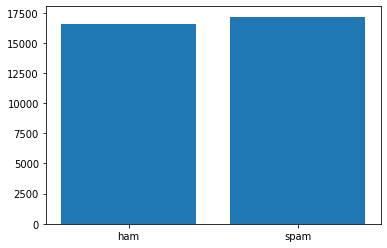

In [89]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(Counter(y).keys(), Counter(y).values(),tick_label =('ham', 'spam'))
plt.show;

#### With this barplot it is clear that We have balanced Classes because both the spam and non-spam mails are in almost same number

#### I am saving the dataset which i made now for future resuability

In [41]:
data = {}
data['Email'] = X
data['Type'] = y
data = pd.DataFrame(data)
data.to_csv("Enron_Email_Dataset.csv", index = False)

### Data cleaning  (Data preprocessing)

##### Importing standard libraries for data preprocessing 

In [42]:
import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

In [43]:
data.head()

,Email,Type
0,b'Subject: nesa / hea \' s 24 th annual meetin...,0.0
1,b'Subject: meter 1431 - nov 1999\r\ndaren -\r\...,0.0
2,"b""Subject: investor here .\r\nfrom : mr . rich...",1.0
3,"b""Subject: hi paliourg all available meds . av...",1.0
4,b'Subject: january nominations at shell deer p...,0.0


In [51]:
X_treated = []

for i in range(0, data.shape[0]): 
    
    # Removing the special characters
    review = re.sub(r'\\r\\n', ' ', str(data['Email'][i]))
    review = re.sub(r'\W', ' ', review)
    
#     #Removes all the numbers 
#     review = re.sub(r'[0-9]+', '', review)
    
    # Removes single characters from a letter
    review = re.sub(r'\s+[a-zA-Z]\s+', ' ', review)
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review) 

    # Replaces multiple spaces with a single space
    review = re.sub(r'\s+', ' ', review, flags=re.I)

    # Removes the 'b' that appears at the beginning
    review = re.sub(r'^b\s+', '', review)
    
    #lowering all the alphabets from the text 
    review = review.lower()
    
    X_treated.append(review)

#### This step is optional, If you want to remove all the stop words then you can use it else you can leave it

#### Stop words are like I, am, is, the, he,she, it, are, etc

In [45]:
for i in range(len(X_treated)):
    
    #spiliting the sentence into the words 
    review = X_treated[i].split()
    
    #removing all the meaning less words(stop words like is, are, am, the)
    review = [word for word in review if not word in stopwords.words('english')]
    
    #making the sentence again from the list of the words
    review = ' '.join(review)
    
    X_treated[i] = review

#### There are so many other things which you can use like stemming and lemmitization but I didn't include those things because it increases the execution time.

In [52]:
data['treated_mails'] = X_treated

#### Now have a look at the preprocessed data

In [53]:
data['treated_mails'][0]

'subject nesa hea 24 th annual meeting saddle up for nesa hea 24 th annual meeting deep in the heart of texas september 9 11 2001 hyatt regency hill country resort san antonio texas the annual meeting planning committee has put together an outstanding program for your review it is attached below in an adobe acrobat pdf file if you have problems with the attachment please call nesa hea headquarters at 713 856 6525 and we ll mail or fax copy out immediately general session topics include will tomorrow restructured electric infrastructure support tomorrow economy power deregulation panel developer ipp utility transmission power marketer government retail power demand the state of the energy industry new political administration impact on energy policy and environment networking opportunities opening reception sunday september 9 golf tournament tours of area attractions monday september 10 the hyatt regency hill country resort has limited block of rooms available for nesa hea members and g

### Lets Do some EDA on the preprocessed data

#### function to visualize words/tokens with their frequencies

In [54]:
def freq_words(x, terms = 20):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(12,15))
    ax = sns.barplot(data=d, x= "count", y = "word")
    ax.set(ylabel = 'Word')
    plt.show()

### Seeing the top 20 most frequent words in Spam mails

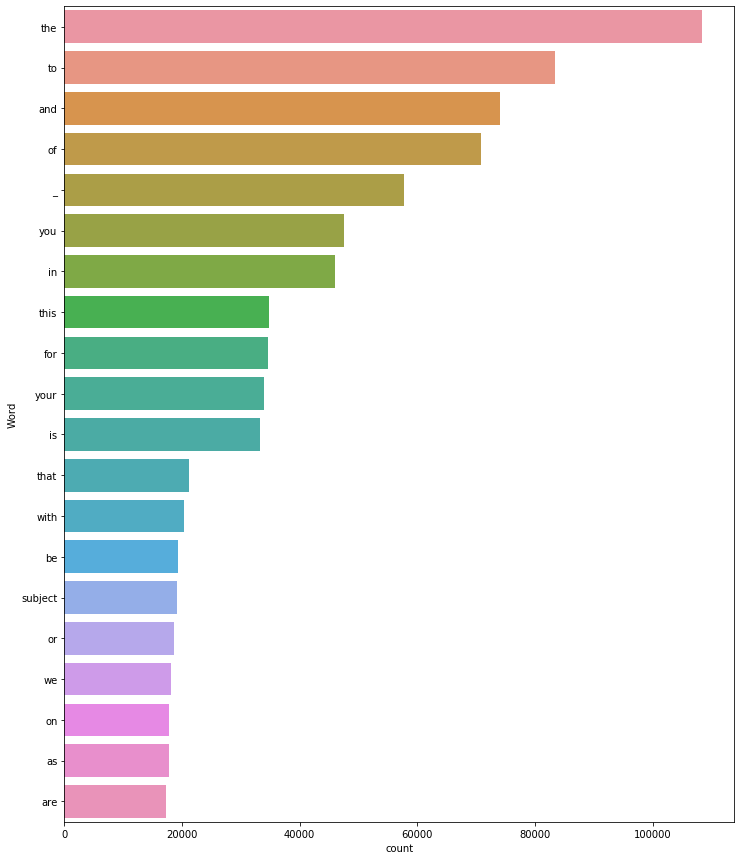

In [55]:
freq_words(data[data['Type'] == 1]['treated_mails'], 20)

### Seeing the top 20 most frequent words in Non-Spam mails

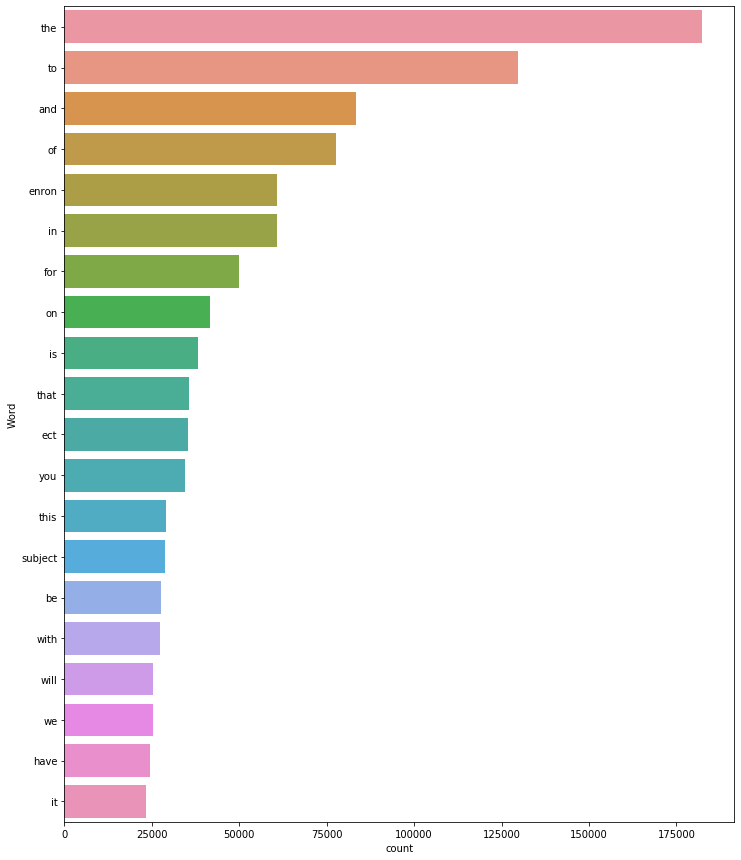

In [56]:
freq_words(data[data['Type'] == 0]['treated_mails'], 20)

### Checking the Distribution of length of the Spam mails 

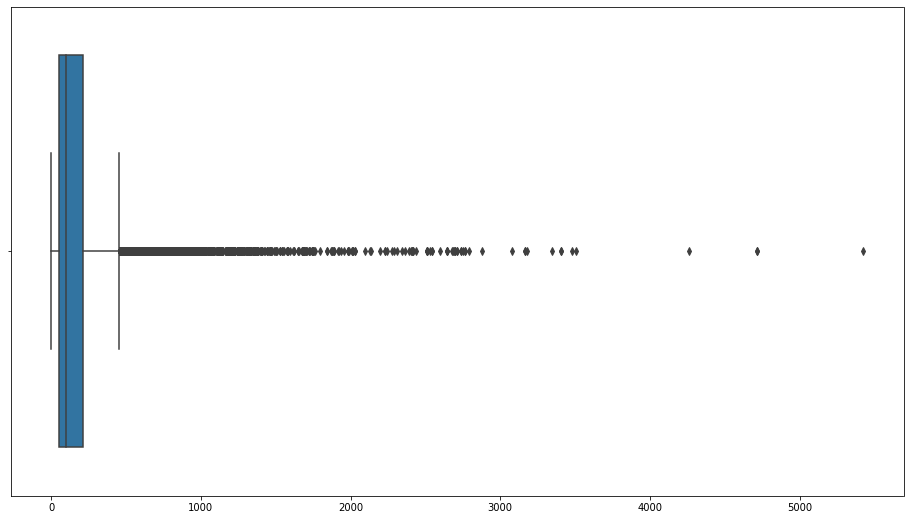

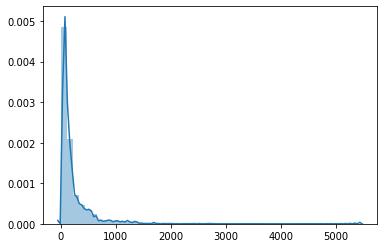

In [65]:
spam_len = [len(mail.split()) for mail in data[data['Type'] == 1]['treated_mails']]
plt.figure(figsize = (16,9))
sns.boxplot(spam_len)
plt.show()
sns.distplot(spam_len)
plt.show()

### Checking the Distribution of length of the Non - Spam mails

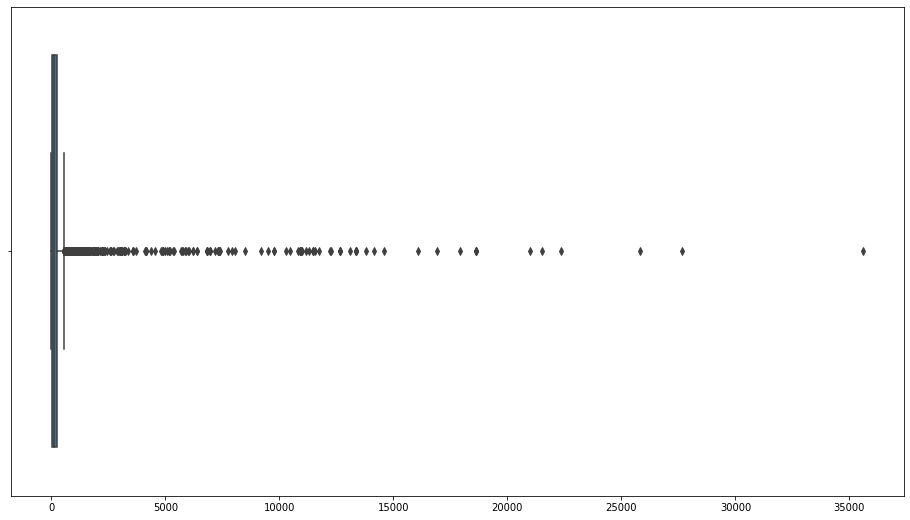

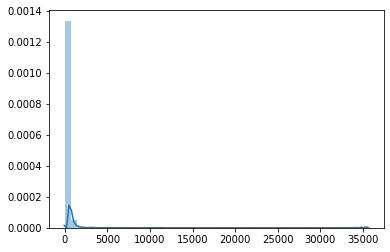

In [66]:
ham_len = [len(mail.split()) for mail in data[data['Type'] == 0]['treated_mails']]
plt.figure(figsize = (16,9))
sns.boxplot(ham_len)
plt.show()
sns.distplot(ham_len)
plt.show()

##### As we can see Spam mails are shorter than the non spam mails. but there are few spam mails which are of big size. But if u will compare it non spam mails, there are so many mails which size is really very big(around 35k) 

### Converting the text into numeric vectors by using Bag of words methods


In [128]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)

X_bow = cv.fit_transform(data['treated_mails']).toarray()
y = data['Type'].values

In [129]:
X_bow[:5]

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 2,  4,  0, ...,  0,  0,  0],
       [16,  0,  0, ...,  0,  0,  0],
       [ 0,  6,  0, ...,  1,  0,  0]], dtype=int64)

In [130]:
y[:5]

array([0., 0., 1., 1., 0.])

#### Spliting the entire data into train and test

In [131]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.3, random_state = 82)

#### To just check whether my test data is biased or not. My test data should also contain same distribution like my train data. 

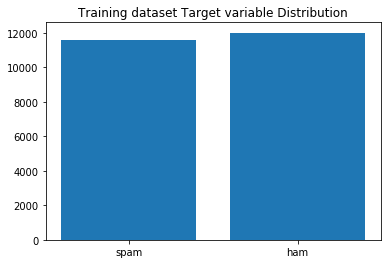

In [132]:
plt.bar(Counter(y_train).keys(), Counter(y_train).values(), tick_label =('ham', 'spam'))
plt.title("Training dataset Target variable Distribution")
plt.show;

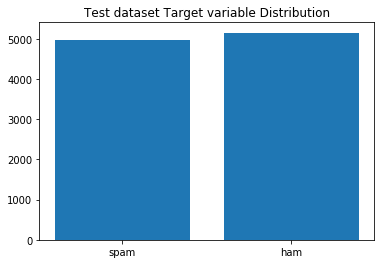

In [133]:
plt.bar(Counter(y_test).keys(), Counter(y_test).values(),tick_label =('ham', 'spam'))
plt.title("Test dataset Target variable Distribution")
plt.show;

#### As we can see Spilling of data is not biased because both of the training and testing data are having same target variable distribution

### Using Different Models

In [134]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

### Applying Naive bayes Model

In [135]:
y_train.shape

(23601,)

In [136]:
X_train.shape

(23601, 2500)

In [137]:
Naive_model = MultinomialNB().fit(X_train, y_train)

In [138]:
predictions = Naive_model.predict(X_train)
score = accuracy_score(y_train,predictions)
print(f"Training Accuracy: {score*100:.2f}%")

Training Accuracy: 97.14%


In [139]:
predictions_test = Naive_model.predict(X_test)
score = accuracy_score(y_test, predictions_test)
print(f"Testing Accuracy: {score*100:.2f}%")

Testing Accuracy: 96.98%


In [140]:
print("Test set confusion matrix:")
y_true = pd.Series(y_test, name='Real')
y_pred = pd.Series(predictions_test, name='Predicted')
pd.crosstab(y_true, y_pred)

Test set confusion matrix:


Predicted,0.0,1.0
Real,,
0.0,4807,155
1.0,150,5003


#### Here we can clearly see that, only 150 spam mails and 155 non spam mails are wrong classified 

### Saving the Model 

In [142]:
import joblib

joblib.dump(Naive_model, 'naive_model.pkl')

['naive_model.pkl']

### Applying Decision Tree Method

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

In [146]:
predictions = DT_model.predict(X_train)
score = accuracy_score(y_train,predictions)
print(f"Training Accuracy: {score*100:.2f}%")

Training Accuracy: 99.98%


In [147]:
predictions_test = DT_model.predict(X_test)
score = accuracy_score(y_test, predictions_test)
print(f"Testing Accuracy: {score*100:.2f}%")

Testing Accuracy: 95.50%


In [148]:
print("Test set confusion matrix:")
y_true = pd.Series(y_test, name='Real')
y_pred = pd.Series(predictions_test, name='Predicted')
pd.crosstab(y_true, y_pred)

Test set confusion matrix:


Predicted,0.0,1.0
Real,,
0.0,4712,250
1.0,205,4948


In [149]:
import joblib

joblib.dump(DT_model, 'DT_model.pkl')

['DT_model.pkl']

### If you compare both of the models, then I will choose naive bayes for my final model because :-
    1. naive bayes have more accuracy than Decision tree
    2. In Decision tree model, the accuracy on training dataset is 99% which indicated that there is overfitting but IF you will look at the Naive bayes,these           results are looking quite promissing.